# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
#     Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.ctime(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | san luis
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | siwa oasis
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | timmins
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | hadibu
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | bodesti
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | blackma

Processing Record 43 of Set 4 | lihue
Processing Record 44 of Set 4 | sittwe
Processing Record 45 of Set 4 | tolanaro
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | lodja
Processing Record 49 of Set 4 | tromso
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 5 | crikvenica
Processing Record 3 of Set 5 | las higueras
Processing Record 4 of Set 5 | grootfontein
Processing Record 5 of Set 5 | moroni
Processing Record 6 of Set 5 | al qitena
Processing Record 7 of Set 5 | mejit
Processing Record 8 of Set 5 | sumbe
Processing Record 9 of Set 5 | tshabong
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | komyshuvakha
Processing Record 12 of Set 5 | goroka
Processing Record 13 of Set 5 | eraan
Processing Record 14 of Set 5 | afaahiti
Processing Record 15 of Set 5 | cabedelo
Processing Record 16 of Set 5 | sweet home
Pr

Processing Record 39 of Set 8 | sinabang
Processing Record 40 of Set 8 | tucurui
Processing Record 41 of Set 8 | skelleftea
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | kailua-kona
Processing Record 44 of Set 8 | thinadhoo
Processing Record 45 of Set 8 | island harbour
Processing Record 46 of Set 8 | yuzhno-kurilsk
Processing Record 47 of Set 8 | gorgan
Processing Record 48 of Set 8 | teruel
Processing Record 49 of Set 8 | hammerfest
Processing Record 0 of Set 9 | dunedin
Processing Record 1 of Set 9 | ugoofaaru
Processing Record 2 of Set 9 | huangmei
Processing Record 3 of Set 9 | reggane
Processing Record 4 of Set 9 | wellington
Processing Record 5 of Set 9 | gurlan
Processing Record 6 of Set 9 | sakaiminato
Processing Record 7 of Set 9 | yayladagi
Processing Record 8 of Set 9 | pskov
Processing Record 9 of Set 9 | chicxulub puerto
City not found. Skipping...
Processing Record 10 of Set 9 | ladario
Processing Record 11 of Set 9 | pursat
Processing Record 12 of

Processing Record 29 of Set 12 | kimbe
Processing Record 30 of Set 12 | tiszaalpar
Processing Record 31 of Set 12 | axim
Processing Record 32 of Set 12 | ferkessedougou
Processing Record 33 of Set 12 | letterkenny
Processing Record 34 of Set 12 | colonia
Processing Record 35 of Set 12 | deming
Processing Record 36 of Set 12 | khabarovsk
Processing Record 37 of Set 12 | rong kwang
Processing Record 38 of Set 12 | awjilah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,18.94,60,20,3.60,ZA,Sun Oct 1 10:34:47 2023
1,hawaiian paradise park,19.5933,-154.9731,22.24,97,100,2.06,US,Sun Oct 1 10:34:47 2023
2,petropavlovsk-kamchatsky,53.0452,158.6483,6.36,91,100,2.00,RU,Sun Oct 1 10:30:36 2023
3,san luis,-33.2950,-66.3356,21.83,28,0,7.72,AR,Sun Oct 1 10:34:48 2023
4,arraial do cabo,-22.9661,-42.0278,21.92,83,100,4.12,BR,Sun Oct 1 10:34:48 2023


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,18.94,60,20,3.60,ZA,Sun Oct 1 10:34:47 2023
1,hawaiian paradise park,19.5933,-154.9731,22.24,97,100,2.06,US,Sun Oct 1 10:34:47 2023
2,petropavlovsk-kamchatsky,53.0452,158.6483,6.36,91,100,2.00,RU,Sun Oct 1 10:30:36 2023
3,san luis,-33.2950,-66.3356,21.83,28,0,7.72,AR,Sun Oct 1 10:34:48 2023
4,arraial do cabo,-22.9661,-42.0278,21.92,83,100,4.12,BR,Sun Oct 1 10:34:48 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

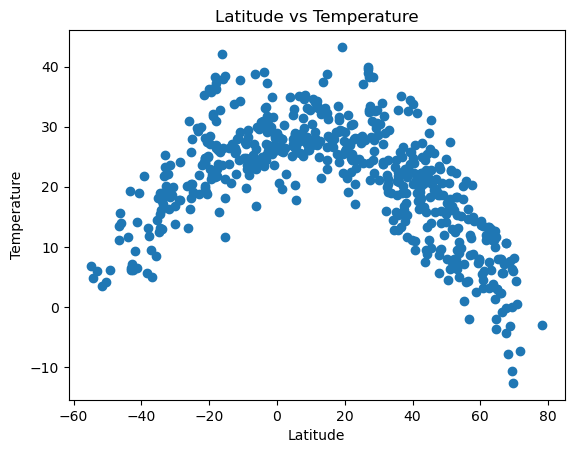

In [21]:
x_column = city_data_df['Lat']
y_column = city_data_df['Max Temp']

plt.scatter(x_column, y_column)


plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs Temperature')

plt.savefig("output_data/Fig1.png")

plt.show()


#### Latitude Vs. Humidity

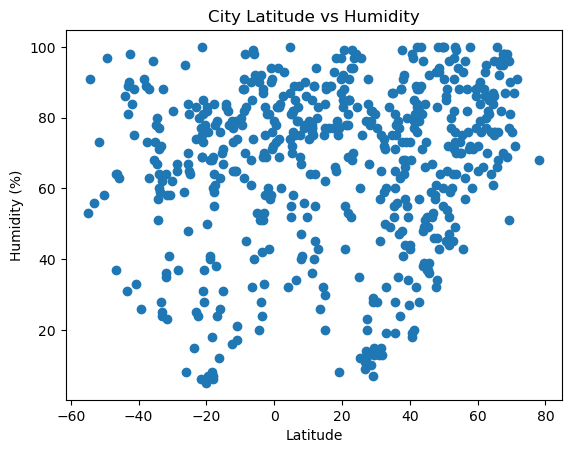

In [24]:
x_column = city_data_df['Lat']
y_column = city_data_df['Humidity']

plt.scatter(x_column, y_column)


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

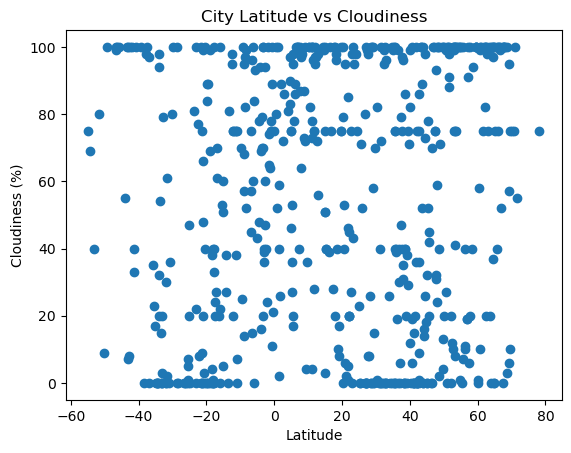

In [25]:
x_column = city_data_df['Lat']
y_column = city_data_df['Cloudiness']

plt.scatter(x_column, y_column)


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

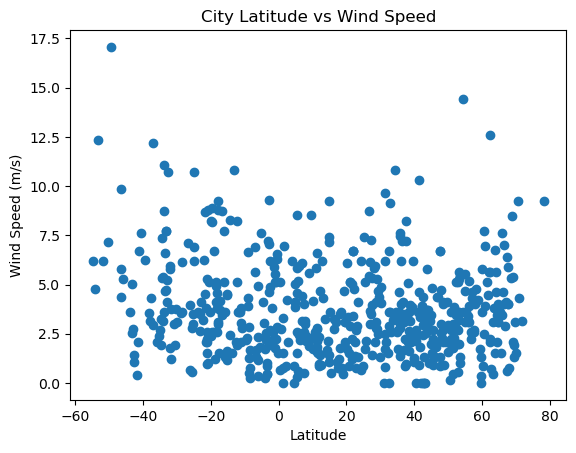

In [26]:
x_column = city_data_df['Lat']
y_column = city_data_df['Wind Speed']

plt.scatter(x_column, y_column)


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed')

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(northern_df["Latitude"], northern_df["Max Temp (Fahrenheit)"])

north_temp_fit = slope * northern_df["Latitude"] + y_int

#Regression equation

north_temp_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(northern_df["Latitude"], northern_df["Max Temp (Fahrenheit)"], edgecolors = "black", facecolor = "red")
plt.plot(northern_df["Latitude"], north_temp_fit, color = "blue", linewidth = 3)
plt.annotate(north_temp_equation, (-8, 40), color = "blue", fontsize = 16)
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-10,90)
plt.savefig("output_data/Northern Lat vs. Temp.png")
plt.show()

#This plot is showing that there is a strong negative correlation between latitude and max temperature.
#As you go further North, the lower the maximum temperature.

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,22.24,97,100,2.06,US,Sun Oct 1 10:34:47 2023
2,petropavlovsk-kamchatsky,53.0452,158.6483,6.36,91,100,2.00,RU,Sun Oct 1 10:30:36 2023
5,ust-nera,64.5667,143.2000,-1.98,61,37,3.45,RU,Sun Oct 1 10:32:24 2023
6,ribeira grande,38.5167,-28.7000,22.65,68,40,3.58,PT,Sun Oct 1 10:34:48 2023
7,siwa oasis,29.2041,25.5195,30.31,28,100,4.65,EG,Sun Oct 1 10:34:48 2023


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,22.24,97,100,2.06,US,Sun Oct 1 10:34:47 2023
2,petropavlovsk-kamchatsky,53.0452,158.6483,6.36,91,100,2.00,RU,Sun Oct 1 10:30:36 2023
5,ust-nera,64.5667,143.2000,-1.98,61,37,3.45,RU,Sun Oct 1 10:32:24 2023
6,ribeira grande,38.5167,-28.7000,22.65,68,40,3.58,PT,Sun Oct 1 10:34:48 2023
7,siwa oasis,29.2041,25.5195,30.31,28,100,4.65,EG,Sun Oct 1 10:34:48 2023


###  Temperature vs. Latitude Linear Regression Plot

R-Squared Value is 0.79


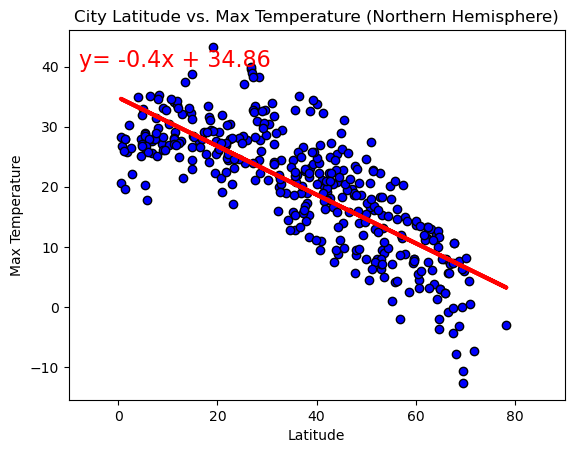

In [35]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

north_temp_fit = slope * northern_hemi_df["Lat"] + y_int

#Regression equation

north_temp_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors = "black", facecolor = "blue")
plt.plot(northern_hemi_df["Lat"], north_temp_fit, color = "red", linewidth = 3)
plt.annotate(north_temp_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.xlim(-10,90)
plt.savefig("output_data/Northern Lat vs. Temp.png")
plt.show()

#This plot is showing that there is a strong negative correlation between latitude and max temperature.
#As you go further North, the lower the maximum temperature.

R-Squared Value is 0.79


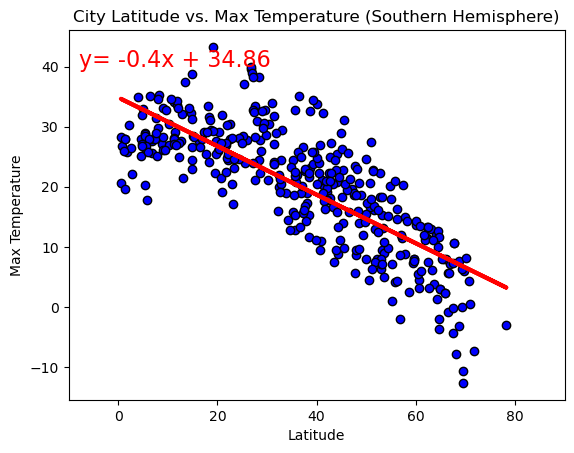

In [38]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

south_temp_fit = slope * southern_hemi_df["Lat"] + y_int

#Regression equation

south_temp_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors = "black", facecolor = "blue")
plt.plot(southern_hemi_df["Lat"], south_temp_fit, color = "red", linewidth = 3)
plt.annotate(south_temp_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.xlim(-10,90)
plt.savefig("output_data/Southern Lat vs. Temp.png")
plt.show()

#This plot is showing that there is a strong negative correlation between latitude and max temperature.
#As you go further North, the lower the maximum temperature.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-Squared Value is 0.13


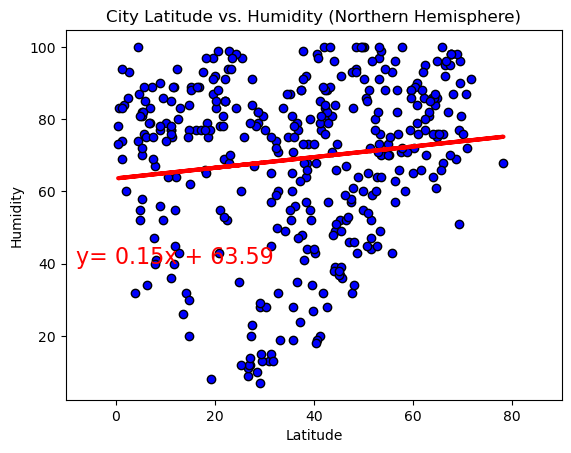

In [43]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

north_hum_fit = slope * northern_hemi_df["Lat"] + y_int

#Regression equation

north_temp_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors = "black", facecolor = "blue")
plt.plot(northern_hemi_df["Lat"], north_hum_fit, color = "red", linewidth = 3)
plt.annotate(north_temp_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-10,90)
plt.savefig("output_data/Northern Lat vs. Humidity.png")
plt.show()

#The data seems to show no relationship between the humidity and latitude for the northern hemisphere.

R-Squared Value is 0.13


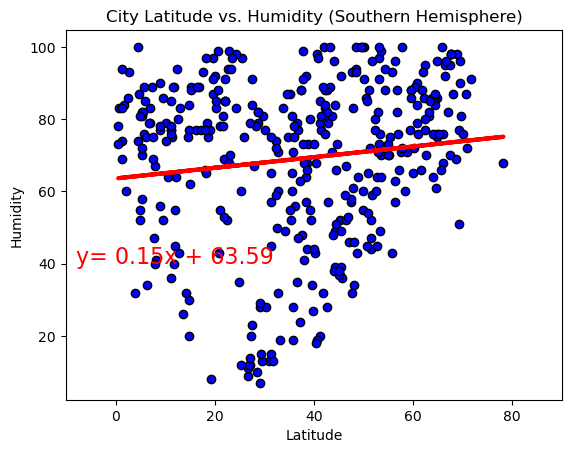

In [44]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

south_hum_fit = slope * southern_hemi_df["Lat"] + y_int

#Regression equation

south_temp_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors = "black", facecolor = "blue")
plt.plot(southern_hemi_df["Lat"], south_hum_fit, color = "red", linewidth = 3)
plt.annotate(south_temp_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-10,90)
plt.savefig("output_data/Southern Lat vs. Humidity.png")
plt.show()

#The data seems to show no relationship between the humidity and latitude for the southern hemisphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-Squared Value is 0.0


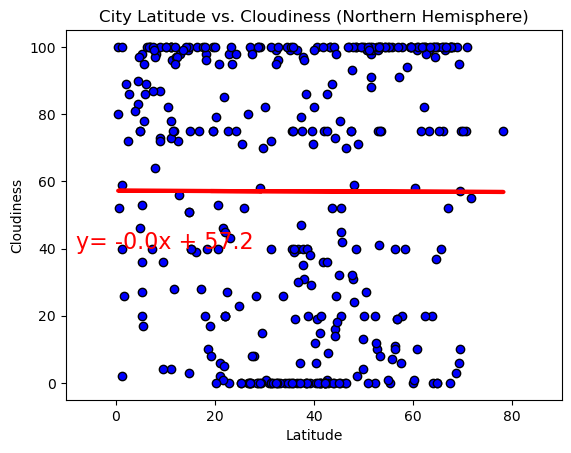

In [45]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

north_cloud_fit = slope * northern_hemi_df["Lat"] + y_int

#Regression equation

north_cloud_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors = "black", facecolor = "blue")
plt.plot(northern_hemi_df["Lat"], north_cloud_fit, color = "red", linewidth = 3)
plt.annotate(north_cloud_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-10,90)
plt.savefig("output_data/Northern Lat vs. Cloudiness.png")
plt.show()

#The data seems to show no relationship between cloudiness and latitude for the northern hemisphere.

R-Squared Value is 0.0


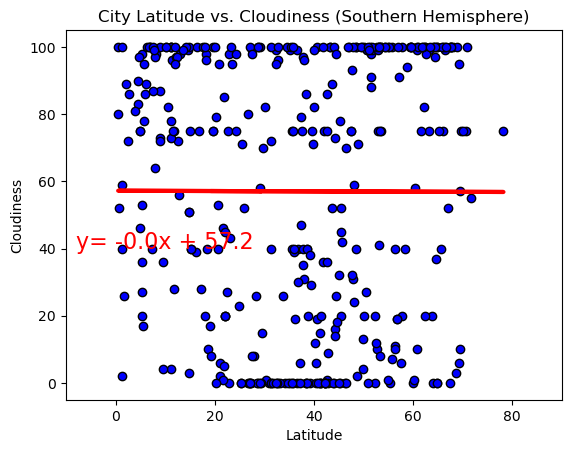

In [51]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

south_cloud_fit = slope * southern_hemi_df["Lat"] + y_int

#Regression equation

south_cloud_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors = "black", facecolor = "blue")
plt.plot(southern_hemi_df["Lat"], south_cloud_fit, color = "red", linewidth = 3)
plt.annotate(south_cloud_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-10,90)
plt.savefig("output_data/Southern Lat vs. Cloudiness.png")
plt.show()

#The data seems to show no relationship between cloudiness and latitude for the southern hemisphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-Squared Value is 0.09


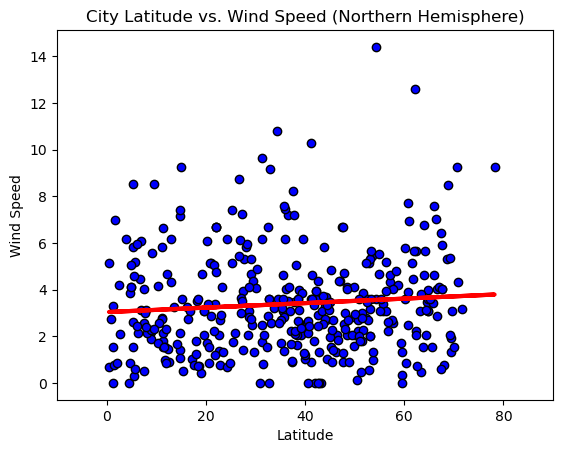

In [49]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

north_wind_fit = slope * northern_hemi_df["Lat"] + y_int

#Regression equation

north_wind_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors = "black", facecolor = "blue")
plt.plot(northern_hemi_df["Lat"], north_wind_fit, color = "red", linewidth = 3)
plt.annotate(north_wind_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-10,90)
plt.savefig("output_data/Northern Lat vs. Wind Speed.png")
plt.show()

#The data seems to show no relationship between wind speed and latitude for the northern hemisphere.

R-Squared Value is 0.09


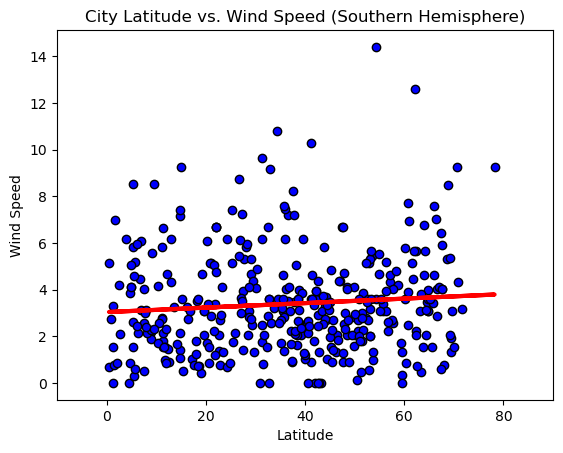

In [50]:
#Creating variable for regression

slope, y_int, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

south_wind_fit = slope * southern_hemi_df["Lat"] + y_int

#Regression equation

south_wind_equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

#Getting R-squared value

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#Creating the scatter plot

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors = "black", facecolor = "blue")
plt.plot(southern_hemi_df["Lat"], south_wind_fit, color = "red", linewidth = 3)
plt.annotate(south_wind_equation, (-8, 40), color = "red", fontsize = 16)
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-10,90)
plt.savefig("output_data/Souther Lat vs. Wind Speed.png")
plt.show()

#The data seems to show no relationship between wind speed and latitude for the southern hemisphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE